In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp           
from scipy import stats

In [3]:
data = pd.read_csv('AAPL.csv')
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,99.402996,100.274305,98.472527,99.390734,88.966260,8.013572e+07
std,46.774423,47.169053,46.394922,46.783957,52.047819,5.966188e+07
min,27.481428,28.000000,27.178572,27.435715,18.372683,1.147590e+07
25%,61.632856,62.176427,60.926072,61.468929,45.855141,3.441850e+07
50%,94.619999,95.532142,93.599998,94.480003,86.628483,6.340480e+07
75%,125.912501,126.834999,124.852499,125.817503,118.175861,1.076744e+08
max,230.779999,233.470001,229.779999,232.070007,231.263092,4.702495e+08


In [4]:
data.Close.describe()

count    2264.000000
mean       99.390734
std        46.783957
min        27.435715
25%        61.468929
50%        94.480003
75%       125.817503
max       232.070007
Name: Close, dtype: float64

In [5]:
close = data.Close
ret = np.zeros(2264)
for i in range(2263):
    ret[i] = close[i+1] - close[i]
ret

array([ 0.468571,  0.052856, -0.487142, ..., -1.020004,  0.080002,
        0.      ])

In [6]:
close.diff()

0             NaN
1        0.468571
2        0.052856
3       -0.487142
4       -0.055714
5        0.200001
6       -0.267143
7       -0.341429
8        0.418571
9       -0.174286
10      -0.500000
11       1.301428
12      -0.472856
13      -0.522858
14      -1.474285
15       0.760000
16       0.410000
17       0.277144
18      -1.227145
19      -1.032856
20       0.381428
21       0.161429
22       0.481428
23      -1.025713
24       0.487142
25      -0.191429
26       0.295715
27      -0.152856
28       0.507141
29       0.244285
          ...    
2234    -5.429993
2235     4.610001
2236     2.119995
2237    -7.669998
2238    -8.880005
2239    -0.199997
2240    -4.490006
2241     2.330002
2242    -0.379990
2243     6.699997
2244    -1.389999
2245    -0.970001
2246     6.240005
2247    -8.130005
2248    -1.970001
2249    -6.229996
2250     1.110001
2251    -0.970001
2252     0.470001
2253     1.849991
2254    -5.470001
2255    -1.539994
2256     2.130005
2257    -5.180008
2258    -4

In [7]:
# 일별 수익률

log_returns = np.log(data.Close).diff()
log_returns.describe()

count    2263.000000
mean        0.000728
std         0.016212
min        -0.131885
25%        -0.007056
50%         0.000676
75%         0.009584
max         0.085022
Name: Close, dtype: float64

In [8]:
# 새로운 obj에 parameter methods 저장

mu = log_returns.mean()
sigma = log_returns.std()
mu, sigma

(0.0007276454711338528, 0.016212433100095347)

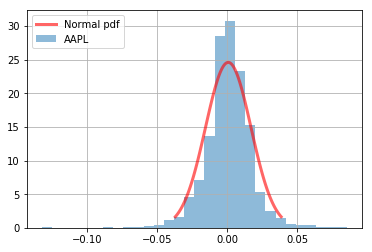

In [10]:
rv = stats.norm(loc= mu, scale= sigma) #애플주식과 같은 mean,std가진 정규분포 생성
r = stats.norm.rvs(loc= mu, scale= sigma,size=3000)  #위의 통계 분포 함수로 확률 변수 생성
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)  #확률밀도 그래프를 위한 100개 점

fig, ax = plt.subplots(1, 1)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
ax.plot(x, rv.pdf(x), 'r-', lw=3, alpha=0.6, label='Normal pdf')
log_returns.hist(bins = 30, label="AAPL", histtype = 'barstacked',
                 density = True, alpha = 0.5)
plt.legend(loc='upper left')
plt.show()